In [1]:
# This is necessary to find the main code
import sys
sys.path.insert(0, '../../bomberman')
sys.path.insert(1, '..')

import pygame

# Import necessary stuff
import random
from game import Game
from monsters.stupid_monster import StupidMonster
from monsters.selfpreserving_monster import SelfPreservingMonster

# TODO This is your code!
sys.path.insert(1, '../groupNN')
from approxqcharacter import ApproxQCharacter
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import time

# Create the game
random.seed(time.time()) # TODO Change this if you want different random choices

pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html


In [5]:
%%capture
ws_history = pd.DataFrame(columns=['w1', 'w2', 'w3', 'w4', 'w5', 'w6', 'w7', 'w8', 'walls', 'monsters', 'exits'])
wall_sum, monster_sum, exit_sum = 0, 0, 0

# ws = [0, 0, 0, 0, 500, 0, 0, 0]
ws = [3.59344369e+03, 2.71034210e+03, 3.54643775e+03, -1.91029131e+01, 5.39162500e+03, -9.84263751e+00, -1.70436406e+00, 0.00000000e+00]
epochs = 2000
ours_y = 7
ours_x = 3
mod = 200

# last_exit = 1
start = time.time()
for i in range(0, epochs):
    g = Game.fromfile('map.txt')
#     g.add_monster(StupidMonster("stupid", "S", 0, 18))
#     g.add_monster(SelfPreservingMonster("aggressive", "A", 3, 13, 2))
    g.add_monster(SelfPreservingMonster("aggressive", "A", 3, 5, 2))

    if i >= 1400:
        ours_y = 0
        ours_x = 0
    elif i % mod == 0:
        ours_y -= 1
#         mod += 20
    ours = ApproxQCharacter("me", "C", ours_x, ours_y)
    ours.ws = ws

    g.add_character(ours)

#     while not g.done():
#         g.world.printit()
#         (g.world, g.events) = g.world.next()
#         pygame.event.clear()
#         g.world.next_decisions()

    g.go(1)

    ws = ours.ws
    
    exit_sum += ours.exitSuccess
    monster_sum += ours.monsterKilled
    wall_sum += ours.wallExploded

    ws_history = ws_history.append({'w1': ws[0], 'w2': ws[1], 'w3': ws[2], 'w4': ws[3], 'w5': ws[4], 'w6': ws[5], 'w7': ws[6], 'w8': ws[7], 'walls': wall_sum, 'monsters': monster_sum, 'exits': exit_sum}, ignore_index=True)
#     if ours.exitSuccess > 1:
#         print(ours.exitSuccess)
#         break
    
end = time.time()   

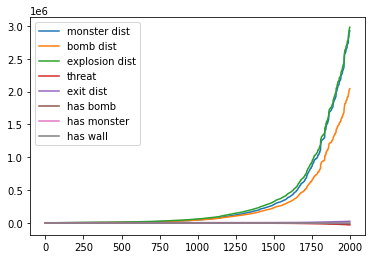

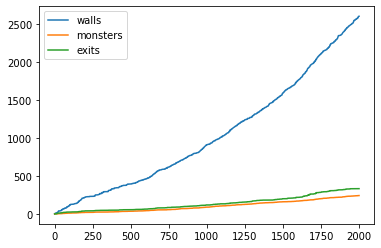

total bombs: 202053.0
333.0/2000 = 0.1665
[ 2.92489358e+06  2.04477094e+06  2.97965503e+06 -2.82170103e+04
  2.71389467e+04 -1.38888946e+04 -2.15130985e+03  0.00000000e+00
  2.60600000e+03  2.42000000e+02  3.33000000e+02]


In [6]:
# print((end - start)/60)

plt.plot(ws_history['w1'], label='monster dist')
plt.plot(ws_history['w2'], label='bomb dist')
plt.plot(ws_history['w3'], label='explosion dist')
plt.plot(ws_history['w4'], label='threat')
plt.plot(ws_history['w5'], label='exit dist')
plt.plot(ws_history['w6'], label='has bomb')
plt.plot(ws_history['w7'], label='has monster')
plt.plot(ws_history['w8'], label='has wall')

plt.legend()
plt.show()

plt.plot(ws_history['walls'], label='walls')
plt.plot(ws_history['monsters'], label='monsters')
plt.plot(ws_history['exits'], label='exits')
plt.legend()
plt.show()

# g.world.printit()

print(f"total bombs: {ws_history['monsters'].sum()}")
print(f"{np.array(ws_history['exits'])[-1]}/{epochs} = {np.array(ws_history['exits'])[-1]/epochs}")
print(np.array(ws_history)[-1])